In [1]:
from stylecopypaste.points.centrepoints import points
from stylecopypaste.segment.roi import SAM

In [2]:
import cv2
def getVerge(p):
    return cv2.cvtColor(cv2.imread(p),cv2.COLOR_BGR2RGB)

verge = getVerge(r"C:\Users\Computing\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\segmentation\seg_dataset\gv_seg\20220605231413_000097_Trim_frame2.jpg")

In [3]:
ps = points(r"C:\Users\Computing\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\copy-paste\Training02.csv")
kx, ky = ps.getClusters(40,0)
denormx, denormy = ps.denorm_centres(verge.shape,kx,ky)

In [4]:
import os
import gc
import torch
gc.collect()
torch.cuda.empty_cache()

#os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"
sam = SAM(checkpoint = "sam_vit_h_4b8939.pth", model_type = "vit_h")

In [5]:
gc.collect()
torch.cuda.empty_cache()

mask = sam.getMask(verge,denormx,denormy)
#takes a long time on cpu

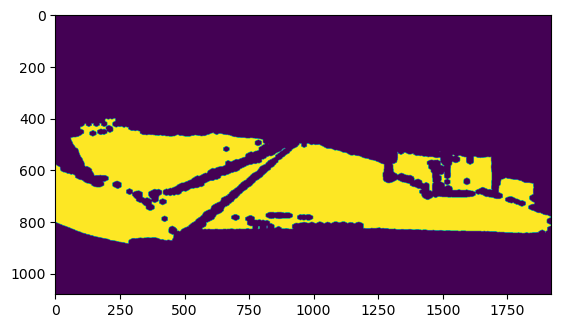

In [6]:
import matplotlib.pyplot as plt
plt.imshow(mask)

In [7]:
from stylecopypaste.datasets.taco import taco
taco_samps = taco(r"C:\Users\Computing\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\copy-paste\TACO\TACO-master\data")

ids = range(100,110)
taco_samps.getTaco(ids)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.24it/s]


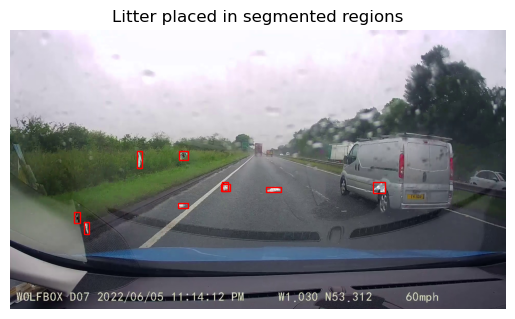

In [9]:
from stylecopypaste.points.centrepoints import segPoints
from stylecopypaste.copypaste.paste import points_paste

sampIms = taco_samps.litIms; sampMasks = taco_samps.litMasks

x,y = segPoints(mask)
result = points_paste(sampIms,sampMasks,verge,x,y,show=True, rotate=True,title = "Litter placed in segmented regions")